# Modelos de ML basados en árboles de decisión

### 1- Arboles de clasificacion 

Responden una secuencia de preguntas si o no

Pueden capturar relaciones no lineales

No necesitan que los datos esten en la misma escala (no hay que aplicar estandarización)

El Maximo de ramas que separa el primer nodo del mas lejano es el maimo de profundidad del árbol

Consisten en una jerarquia de nodos. Cada nodo puede ser una predicción o una pregunta

La raiz (root) es el nodo donde empieza el árbol, no tiene ningun nodo padre y hace una pregunta que crea dos nodos hijos

Los nodos internos (internal) tienen un padre y hacen una pregunta que crea dos nuevos hijos nodos

Un nodo que no tiene hijos y si tienen un padre se conoce como hoja (leaf)

En cada nodo se separa la data basandose en una feature y un split-point, siempre tratando de maximizar la obtencion de informacion (IG: Information Gain). Si IG=0 el nodo se declara una hoja (leaf)

#### 1.1- Entrenemos un árbol de clasificacion

In [1]:
import pandas as pd

# Traemos los datos
wbc = pd.read_csv("datasets/MLTreeModels/wbc.csv")

print(list(wbc.columns))

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [2]:
wbc[['diagnosis', "radius_mean", "concave points_mean"]].head()

,diagnosis,radius_mean,concave points_mean
0,M,17.99,0.14710
1,M,20.57,0.07017
2,M,19.69,0.12790
3,M,11.42,0.10520
4,M,20.29,0.10430


In [3]:
print(wbc['diagnosis'].unique())

# Reemplazamos por 1 y 0
wbc['diagnosis'] = wbc['diagnosis'].replace(['M', 'B'], [1, 0])

['M' 'B']


In [4]:
X = wbc[["radius_mean", "concave points_mean"]]
y = wbc[["diagnosis"]]

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividimos la data en conjunto de entrenamiento y testeo
# con stratify y estamos pidiendo que la proporcion en el
# conjunto de testeo sea la misma que en el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

In [6]:
dt = DecisionTreeClassifier(max_depth=8, random_state=1, criterion="gini")

# Ajustamos el modelo
dt.fit(X_train, y_train)

# Predicimos
y_pred = dt.predict(X_test)

# Evaluamos
score = accuracy_score(y_test, y_pred)
print("decision tree score", score)

decision tree score 0.9210526315789473


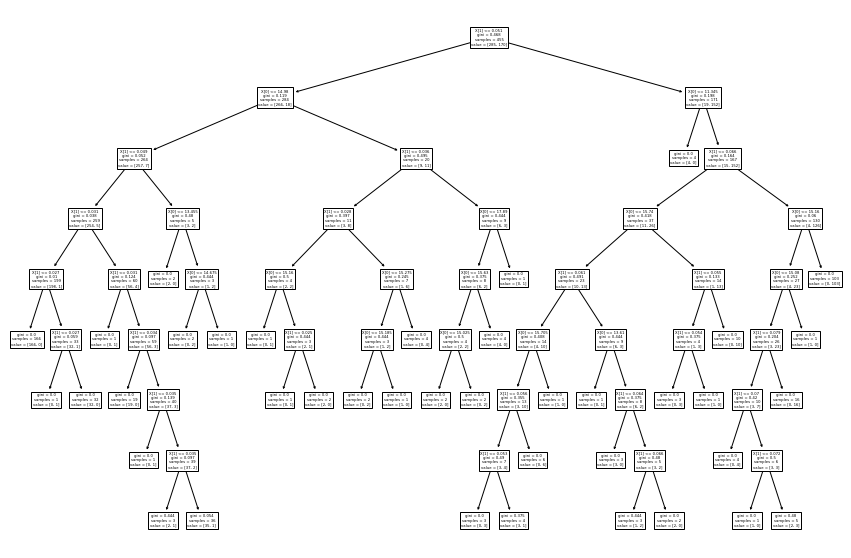

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
plot_tree(dt, ax=ax)
plt.show()

Entrenando con un modelo Logit

In [7]:
from sklearn.linear_model import  LogisticRegression

logreg = LogisticRegression(random_state=1)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Logit score", score)

Logit score 0.8859649122807017


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
